# F215089
## 20 January 2023
### Student Attendance Program

- The student attendance program monitors the weekly attendance of the modules. 
- Upon performing the validity checks, if a correct ID is entered the attendance for the 2 modules are presented and if an incorrect ID is entered the program tells the tutor that the student id is not found.
- The last cell has the function(main_student_att) that makes use of all the functions in this program. 
- It requires the senior tutor to input the student_id to be monitored.

## Imports

In [1]:
# importing packages
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ipynb

##  Database operations

In [2]:
def load_join_table(sqlstr):
    """
    This function joins and loads dataframes from the sql
    database to the python
    input:
        sqlstr: sql join statement in """ """
    return:
        the joined dataframe
    """
    
    conn = sqlite3.connect("CWDatabase.db")
    df = pd.read_sql(sqlstr,
                    con=conn, index_col = ["sess_id"])
    return df

## Calculating the Weekly attendance

In [3]:
def weekly_attendance(dfData):
    """
    This function calculates the weekly attendance
    
    input:
        df: the name of the csv file
    return:
        df_module_weekly_attendance: the weekly attendance of the module
    """
    #calculate the module 
    df_module_weekly_attendance = dfData.groupby('week').agg("mean") *100
    df_module_weekly_attendance = df_module_weekly_attendance.transpose()
    df_module_weekly_attendance.reset_index(inplace = True)
    df_module_weekly_attendance.rename(columns = {'index':'student_id'}, inplace= True)
    return df_module_weekly_attendance

## Getting Weekly Attendance for the modules using the student id

In [4]:
def student_attendance(df1, df2, modulename1, modulename2,student_id):
    """This function joins and loads dataframes from the sql
    database to the python
    input:
        df1: first module dataframe
        df2: second module dataframe
        modulename1: name of df1
        modulename2: name of df2
        student_id: The student id number to  be checked
    return:
        df_final_module: a table showing the weekly attendance of the student id requested
        for the 2 modules
        fig: a graph showing the weekly attendance of the student id requested for the 2 modules
    """
    #calculate the weekly attendance for the 2 modules'
    df_module1_weekly_attendance  = weekly_attendance(df1)
    df_module2_weekly_attendance = weekly_attendance(df2)
    df_module1_weekly_attendance.set_index("student_id", inplace = True)
    df_module2_weekly_attendance.set_index("student_id", inplace = True)
    student_id = str(student_id)
    #check for the student_id in both modules 
    if student_id in df_module1_weekly_attendance.index and student_id in df_module2_weekly_attendance.index:
        #create a new dataframe for module1 containing the all weeks with the requested student_id
        new_df_module1_weekly_attendance = df_module1_weekly_attendance.loc[[student_id], "W1":]
        new_df_module1_weekly_attendance = new_df_module1_weekly_attendance.transpose()
        new_df_module1_weekly_attendance.columns= [modulename1]
        #create a new dataframe for module2 containing the all weeks with the requested student_id
        new_df_module2_weekly_attendance = df_module2_weekly_attendance.loc[[student_id], "W1":]
        new_df_module2_weekly_attendance = new_df_module2_weekly_attendance.transpose() 
        new_df_module2_weekly_attendance.columns= [modulename2]
        df_final_module = pd.concat([new_df_module1_weekly_attendance,\
                              new_df_module2_weekly_attendance],\
                             axis=1) #combining the dataframes from each module together
        df_final_module = df_final_module.round(1)
        df_final_module.reset_index(inplace = True)
        df_final_module.columns = ["Week No", modulename1+"%", modulename2+"%"] #renames the columns
        df_final_module.set_index("Week No", inplace = True)
        df_final_module.rename(index={"W1": 1, "W2": 2, "W3": 3, "W4": 4, "W5": 5, "W6": 6}, inplace = True)
        fig, ax = plt.subplots()
        df_final_module.plot.bar(rot = 0, title=f"The attendance record of Student ID {student_id}", ax = ax)
        plt.close()
        return df_final_module, fig
    else:
        #print("Student ID not found")
        return None, "Student ID not found"

##  Applying functions on the given dataset

,COA111%,COA122%
Week No,,
1,100.0,100.0
2,50.0,50.0
3,100.0,100.0
4,50.0,66.7
5,100.0,100.0
6,NaN,100.0


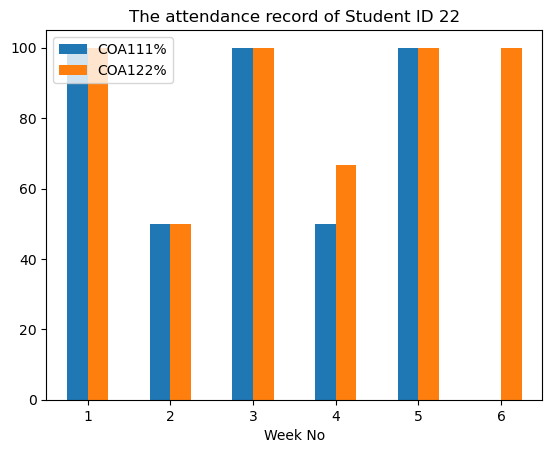

In [5]:
def main_student_att(student_id):
    
    #reading the tables from the database
    dfCOA111 = load_join_table(sqlstr="""
    SELECT T.*, C.week
    FROM COA111T T INNER JOIN COA111Sessions C
    ON T.sess_id = C.sess_id
    """)
    dfCOA122 = load_join_table(sqlstr="""
    SELECT T.*, C.week
    FROM COA122T T INNER JOIN COA122Sessions C
    ON T.sess_id = C.sess_id;
    """)
    
    table, fig = student_attendance(dfCOA111, dfCOA122, "COA111", "COA122", student_id)
    return table, fig 

# calling main_student_att function
table,fig = main_student_att(22)
display(table)
display(fig)   
